In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.5f' % x)

from src.config import INPUT_PATH, OUTPUT_PATH

In [2]:
sensors = pd.read_csv(INPUT_PATH / "sensor_geometry.csv")
sensors[["x", "y", "z"]] /= 500
sensors.describe()

,sensor_id,x,y,z
count,5160.00000,5160.00000,5160.00000,5160.00000
mean,2579.50000,0.01174,-0.00504,-0.04781
std,1489.70803,0.57030,0.53882,0.59291
min,0.00000,-1.14180,-1.04216,-1.02564
25%,1289.75000,-0.44818,-0.41814,-0.56640
50%,2579.50000,0.03398,-0.01211,-0.07023
75%,3869.25000,0.44916,0.42332,0.45711
max,5159.00000,1.15274,1.01900,1.04912


In [3]:
batch = pd.read_parquet(INPUT_PATH / "train" / "batch_2.parquet")

In [4]:
batch["time"].describe()

count   31948000.00000
mean       12908.65021
std         4384.76812
min         5712.00000
25%        10545.00000
50%        11760.00000
75%        13764.00000
max        84577.00000
Name: time, dtype: float64

count   31948000.00000
mean           0.14782
std            0.58464
min           -0.81173
25%           -0.16733
50%           -0.00533
75%            0.26187
max            9.70360
Name: time, dtype: float64


<AxesSubplot: >

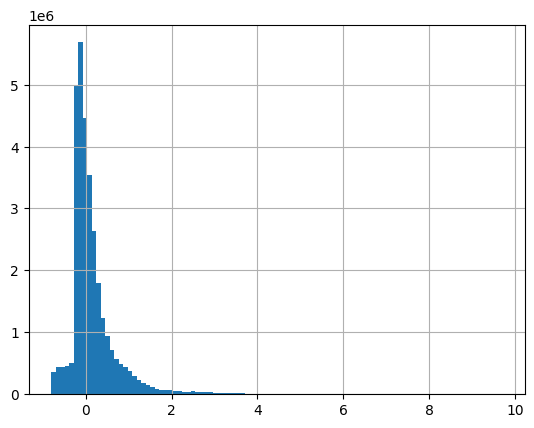

In [9]:
time_norm2 = ((batch["time"] - 1e4) / 3e4)

time_norm2 -= 0.06
time_norm2 *= 4

print(time_norm2.round(5).describe())     
time_norm2.hist(bins=100)

In [10]:
# ((np.log10(batch["time"]) - 4.0) * 2).hist(bins=100)

In [11]:
# ((np.log(batch["time"]) - 9.2)).hist(bins=100)

In [12]:
batch["time"].median(), batch["time"].quantile(0.75) - batch["time"].quantile(0.25)

(11760.0, 3219.0)

<AxesSubplot: >

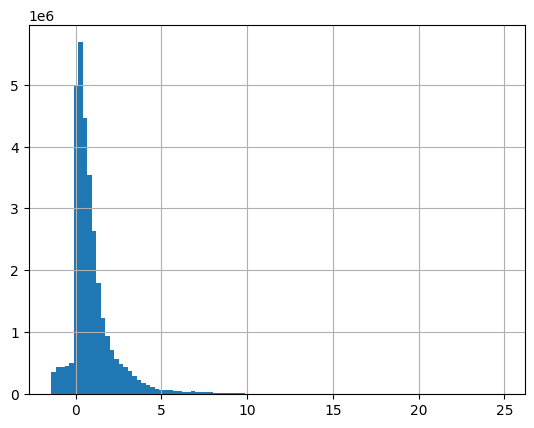

In [13]:
time_norm3 = (batch["time"] - 1e4) / 3e4  # GraphNet scaling https://github.com/graphnet-team/graphnet/blob/4df8f396400da3cfca4ff1e0593a0c7d1b5b5195/src/graphnet/models/detector/icecube.py#L68
time_norm3 *= 10      
time_norm3.hist(bins=100)

In [14]:
time_norm3.describe()

count   31948000.00000
mean           0.96955
std            1.46159
min           -1.42933
25%            0.18167
50%            0.58667
75%            1.25467
max           24.85900
Name: time, dtype: float64